# Preprocessing for Deep Learning
In this notebook, we preprocess the dataset on 'merged_dataset.csv' to prepare it for deep learning models. This involves steps like cleaning, encoding, and padding the text data.

### Importing Necessary Libraries
Here, we importing the necessary libraries for data preprocessing, visualization, and encoding. These libraries provide essential tools for handling data and implementing the required transformations.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Loading the Dataset
The dataset is loaded from a CSV file into a pandas DataFrame. This allows us to inspect, clean, and preprocess the data.


In [2]:
# Load the dataset
df = pd.read_csv('merged_dataset.csv')

### Exploring the Dataset
We inspect the dataset structure and summary statistics to understand its content and quality.


In [3]:
# first few rows
print(df.head())


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


This step provides a summary of the dataset's structure and metadata:

1. **`info()` Method**:
   - Displays essential details about the DataFrame, including:
     - The number of rows and columns.
     - Column names and their data types.
     - The count of non-null values in each column.
     - Memory usage of the DataFrame.

2. **Purpose**:
   - Understand the structure of the dataset.
   - Identify data types of columns (e.g., numerical, categorical, or object).
   - Check for columns with missing values or inconsistent data types.

This information helps in:
- Planning preprocessing steps, such as handling missing values or converting data types.
- Ensuring the dataset is ready for analysis and modeling.


In [4]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None


### Checking for Missing Values

This step identifies any missing values in the dataset:

1. **`isnull()` Method**:
   - This method checks each cell in the DataFrame to see if it contains a missing value (`NaN`).
   
2. **`sum()` Method**:
   - By applying `.sum()` on the result of `isnull()`, we calculate the total number of missing values for each column.

Understanding missing values is crucial for:
- Deciding whether to remove rows/columns with too many missing values.
- Applying imputation techniques to fill missing values with appropriate substitutes.
- Ensuring data quality and consistency before proceeding with further preprocessing.


In [5]:
print(df.isnull().sum())

Text        0
Language    0
dtype: int64


The `df.shape` attribute gives the number of rows (samples) and columns (features) in the dataset. This helps quickly assess the dataset's size and structure.


In [6]:
# check shape
print(df.shape)

(32337, 2)


View a few random samples for specific languages:


In [7]:
language_sample = df[df['Language'] == 'English'].sample(5)
print(language_sample['Text'])


22737    In particular, it commonly serves as a target ...
16762    all one tribe hand drum e-mu procussion linn l...
1914     the ride channel a youtube skateboarding chann...
6846     at least  of googles products features and ser...
22917    [61] Rule-based machine learning approaches in...
Name: Text, dtype: object


# Text Cleaning

This step removes unwanted patterns from the text data to ensure consistency:

1. **Using Regular Expressions (`re`)**:
   - The function `clean_text` removes any content within square brackets (`[ ... ]`) from the text using the `re.sub` method.

2. **Stripping Whitespace**:
   - The `.strip()` method is used to remove leading and trailing whitespace for cleaner text.

3. **Applying the Function**:
   - The `apply(clean_text)` method applies the `clean_text` function to the `Text` column, creating a new `Cleaned_Text` column with the processed text.

This ensures the text is cleaner and more standardized for further analysis and model training.



In [8]:
import re

def clean_text(text):
    # Remove text in brackets
    text = re.sub(r'\[.*?\]', '', text)
    return text.strip()

# Apply to the entire dataset
df['Cleaned_Text'] = df['Text'].apply(clean_text)


### Converting Text to Lowercase

This step standardizes the text data by converting all characters to lowercase:

1. **`str.lower()` Method**:
   - Transforms all uppercase letters in the `Cleaned_Text` column to lowercase.

2. **Purpose**:
   - Ensures uniformity in the text data.
   - Avoids treating words like "Hello" and "hello" as different during analysis or modeling.





In [9]:
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


### Viewing Sample Text Data

Displays 10 random rows from the `Text` and `Cleaned_Text` columns to compare the original and cleaned text. This helps verify the effectiveness of the cleaning process.




In [10]:
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
25476  Lorsque le magazine Time a reconnu « Vous » (Y...   
1432   العقد الفريد في اثبات الفرد الشرعي من التقليد ...   
31129  مبني بلغة بي إتش بي، ويعتمد على قواعد بيانات م...   
20251  en el departamento hay tres operadores de tele...   
12096  dezumflarea vestei de salvare în vederea cobor...   
13311  ocymyrmex gordoni is een mierensoort uit de on...   
23392  പ്രപഞ്ചത്തിലെ വസ്തുക്കളുടെ അന്തരീക്ഷത്തിന് പുറ...   
21813  oyama station was opened on  april  the statio...   
9321   پیغمبر اکرم صلی اللہ علیہ و آلہ و سلم  تمہارا ...   
27837  μπορώ να πω φροντίστε, που σημαίνει να φροντίζ...   

                                            Cleaned_Text  
25476  lorsque le magazine time a reconnu « vous » (y...  
1432   العقد الفريد في اثبات الفرد الشرعي من التقليد ...  
31129  مبني بلغة بي إتش بي، ويعتمد على قواعد بيانات م...  
20251  en el departamento hay tres operadores de tele...  
12096  dezumflarea vestei de salvare în vede

### Here we check null values on cleaned_Text


In [11]:
print(df['Cleaned_Text'].isnull().sum())


0


### Viewing Sample Data

Displays 10 random rows from the `Text`, `Language`, and `Cleaned_Text` columns to compare the original text, its language label, and the cleaned text. This helps verify the preprocessing and understand the dataset's structure.




In [12]:
print(df[['Text', 'Language', 'Cleaned_Text']].sample(10))

                                                    Text    Language  \
25044                                          Meu Deus.  Portugeese   
24953  para mim embaixo dele me dizendo qual dessas 1...  Portugeese   
31901                        Sie waren Mellie und Terry.      German   
1726   پښتو د سترې هندو اروپايي ژبنۍ کورنۍ په اَريايي...      Pushto   
25425  Dans Anthropologie Structurale 2, Lévi-Strauss...      French   
28769  og få disse beundrende udseende fra dine venne...      Danish   
2944    juli  - pasukan thariq bin ziyad dibantu oleh...  Indonesian   
25843  Le programme jouait au Jeu de Dames et s'améli...      French   
26967  Una vez que la comunidad logra el consenso sob...     Spanish   
16740  i̇stanbul üniversitesi hukuk fakültesinden  yı...     Turkish   

                                            Cleaned_Text  
25044                                          meu deus.  
24953  para mim embaixo dele me dizendo qual dessas 1...  
31901                        s

### Examining Language Distribution in the Dataset

This step helps us understand the distribution of languages in the dataset. We perform the following tasks:

1. **Count Language Occurrences**:
   - The `value_counts()` method is used to calculate the frequency of each language in the dataset. This provides insight into how balanced or imbalanced the dataset is across different language categories.

2. **Visualize the Distribution**:
   - A bar plot is generated to visually represent the frequency of each language. This helps in identifying patterns or anomalies, such as overrepresented or underrepresented languages.

Understanding the language distribution is crucial for:
- Balancing the dataset, if necessary.
- Ensuring the model is not biased toward the majority class.
- Designing preprocessing and sampling strategies based on class representation.


Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


<Axes: title={'center': 'Language Distribution'}, xlabel='Language'>

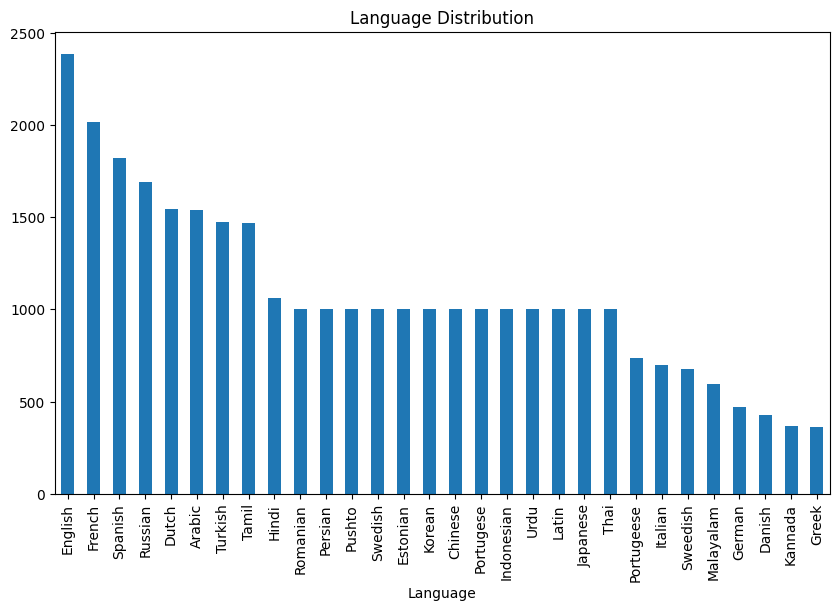

In [13]:
language_count = df['Language'].value_counts()
print(language_count)
language_count.plot(kind='bar', figsize=(10, 6), title='Language Distribution')


### Visualizing Language Distribution as Percentages

This code generates a horizontal bar chart to visualize the distribution of languages in the dataset as percentages:

1. **Calculating Percentages**:
   - The `value_counts()` method counts the occurrences of each language.
   - Percentages are calculated by dividing the counts by the total number of rows and multiplying by 100.

2. **Purpose**:
   - Provides a clear visual understanding of how the dataset is distributed across different languages.
   - Highlights any imbalances that might affect model performance.


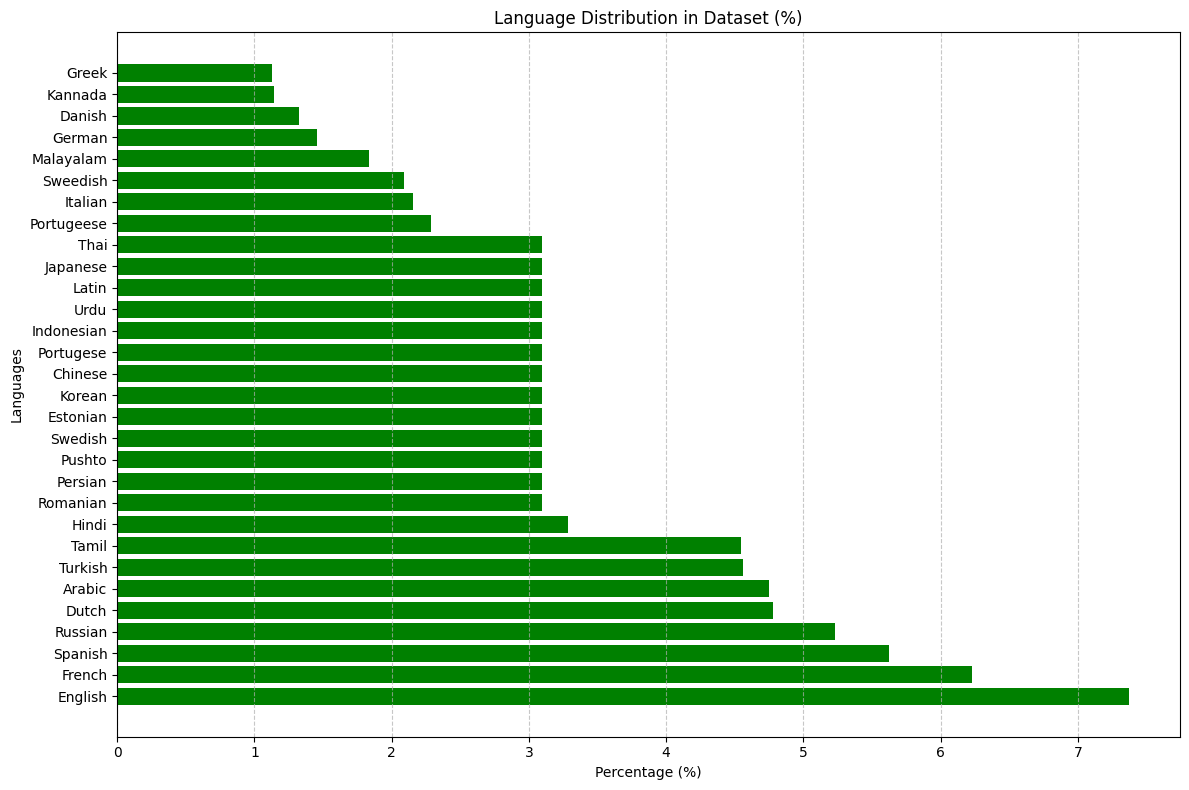

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the language counts
language_counts = df['Language'].value_counts()

# Extract languages and their corresponding percentages
languages = language_counts.index.tolist()
percentages = (language_counts.values / len(df) * 100).tolist()

# Plot bar graph for language distribution percentages
plt.figure(figsize=(12, 8))
plt.barh(languages, percentages, color='green')
plt.xlabel("Percentage (%)")
plt.ylabel("Languages")
plt.title("Language Distribution in Dataset (%)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Plotting the Distribution**:
   - A horizontal bar chart (`barh`) is created to display the percentage of each language in the dataset.
   - The plot includes:
     - **X-axis**: Percentage of samples.
     - **Y-axis**: Language names.
     - **Title**: Describes the chart.

### verify the  any missing values

In [15]:
print(df.isnull().sum())


Text            0
Language        0
Cleaned_Text    0
dtype: int64


### verify shape after cleaning datset

In [16]:
print(df.shape)

(32337, 3)


 # Split the Data

### Splitting the Dataset

This code splits the dataset into training and testing subsets:

1. **Features (`X`) and Labels (`y`)**:
   - `X`: The `Cleaned_Text` column, which contains the preprocessed text data.
   - `y`: The `Language` column, which contains the corresponding language labels.

2. **`train_test_split` Function**:
   - Splits the data into:
     - `X_train` and `y_train`: For training the model.
     - `X_test` and `y_test`: For evaluating the model's performance.
   - `test_size=0.2`: 20% of the data is allocated to the test set.
   - `random_state=42`: Ensures reproducibility by producing the same split every time.

3. **Purpose**:
   - Separates data for training and validation to prevent overfitting.
   - Ensures the model is tested on unseen data for reliable performance evaluation.


In [17]:
# just check the columns name
print(df.columns)

Index(['Text', 'Language', 'Cleaned_Text'], dtype='object')


In [18]:
# split dataset
from sklearn.model_selection import train_test_split

X = df['Cleaned_Text']
y = df['Language']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Encoding Labels for Training

This code encodes the language labels into numerical format using `LabelEncoder`:

1. **`LabelEncoder` Initialization**:
   - `LabelEncoder` is a preprocessing tool from `sklearn` that converts categorical data into numerical values.

2. **Fitting and Transforming**:
   - `le.fit_transform(y_train)`:
     - Learns the unique classes in `y_train`.
     - Converts each class (language) into a unique integer.

3. **`le.classes_`**:
   - Lists all the unique classes (languages) in the dataset in the order they are encoded.

4. **Purpose**:
   - Converts categorical labels into numerical form required by machine learning models.
   - Ensures consistent mapping between languages and their numerical representations.


In [19]:
le =LabelEncoder()
y_train= le.fit_transform(y_train)
le.classes_

array(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Sweedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'], dtype=object)

### Transforming Test Labels

This code converts the `y_test` labels into numerical format using the previously fitted `LabelEncoder`:

1. **`le.transform(y_test)`**:
   - Transforms the language labels in `y_test` to their corresponding numeric values based on the encoding learned during `le.fit_transform(y_train)`.

2. **Purpose**:
   - Ensures that the same label-to-integer mapping is applied to both training and test sets for consistency.
   - Prepares the `y_test` labels for evaluation during model testing.


In [20]:
y_test = le.transform(y_test)

# Tokenizing Text Data

This code prepares the text data for deep learning by converting it into sequences of integers:

1. **Initializing the Tokenizer**:
   - `Tokenizer(num_words=40000)`:
     - Limits the vocabulary to the top 40,000 most frequent words in the training data.
     - Helps in reducing memory usage and focusing on the most relevant words.

2. **Fitting the Tokenizer**:
   - `tokenizer.fit_on_texts(X_train)`:
     - Builds the vocabulary based on the `X_train` data.
     - Assigns a unique integer to each word in the vocabulary.

3. **Converting Text to Sequences**:
   - `texts_to_sequences(X_train)` and `texts_to_sequences(X_test)`:
     - Transforms the text in `X_train` and `X_test` into sequences of integers where each integer corresponds to a word in the tokenizer's vocabulary.

4. **Purpose**:
   - Converts textual data into numerical format required for input to deep learning models.
   - Ensures that both training and test data are tokenized using the same vocabulary.


In [21]:
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding Sequences

This code ensures that all input sequences have the same length, making them suitable for deep learning models:

1. **`pad_sequences` Function**:
   - Converts sequences of varying lengths into fixed-length sequences by adding padding.

2. **Parameters**:
   - `X_train_seq` and `X_test_seq`: Input sequences to be padded.
   - `maxlen=100`: Ensures all sequences are either truncated or padded to a maximum length of 100.
   - `padding='post'`: Adds padding at the end of each sequence.

3. **Purpose**:
   - Standardizes the input size for the model.
   - Prevents issues caused by varying sequence lengths during training and testing.


In [22]:
X_train_padded = pad_sequences(X_train_seq,maxlen=100,padding='post')
X_test_padded = pad_sequences(X_test_seq,maxlen=100,padding='post')

# Explanation of below code
- **`input_dim`**: This represents the number of unique words in the tokenizer, which is crucial for defining the size of the input layer of the neural network. It is obtained using `tokenizer.num_words`. We use this to create an embedding layer that can map each unique word to a vector of real numbers.
  
- **`embedding_dim`**: This specifies the dimensionality of the word embeddings (i.e., the size of the vector for each word). We set it to 128, a commonly used value that balances model complexity and performance. The embedding layer will learn a vector representation of each word, which helps in capturing semantic relationships between words.

- **`max_length`**: This represents the maximum length of the input sequences. We set it using `X_train_padded.shape[1]`, which is the length of the padded sequences. Padding ensures that all sequences in the input data have the same length, which is required for processing them in batches by the neural network.

- **`num_classes`**: This is the number of unique labels (or classes) in the dataset. We determine it using `len(le.classes_)`. It is used to define the output layer of the model, ensuring that the network can classify the input into one of these classes.

- **`max_length` (again)**: This is repeated to emphasize that it's an important parameter when working with sequences, as it defines the maximum number of tokens in each input sequence.



In [23]:
input_dim = tokenizer.num_words
embedding_dim = 128
max_lenght = X_train_padded.shape[1]
num_classes = len(le.classes_)
max_lenght

100

# saving cleaned dataset
This code saves the cleaned dataset to a new CSV file named `cleaned_dataset.csv` and prints a confirmation message indicating the successful save. It is useful for storing processed data for future use or analysis.



In [24]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.


# Why Use `joblib`?

We used `joblib` to save the tokenizer and label encoder because:

1. **Efficiency:** It's optimized for handling large objects, like transformers or models, faster than `pickle`.
2. **Compression:** Creates smaller, compressed files for better storage management.
3. **Ease of Use:** Simple `dump` and `load` methods for saving and reloading objects.
4. **Reliability:** Handles complex objects like NumPy arrays without issues.


In [26]:
import joblib

joblib.dump(tokenizer, 'tokenizer.joblib')

joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']